In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
# read the dataset
data=pd.read_csv("weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.isna().sum() # data look ok because it has no null values

Gender    0
Height    0
Weight    0
dtype: int64

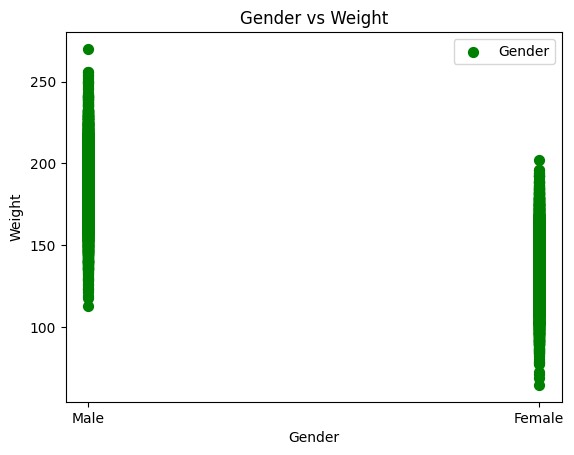

In [5]:
# check the correlation amoung the data
# gender vs weight
x1=data.iloc[:,0].values
y1=data.iloc[:,2].values
plt.scatter(x1,y1,label='Gender',color='green',s=50)
plt.title("Gender vs Weight")
plt.xlabel("Gender")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [6]:
data.Gender=data.Gender.apply(lambda x:  0 if x=='Female' else 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [8]:
data.Gender.corr(data.Weight)

0.7967233452062232

##### 0.7967233452062232  
- Here in the above plot, we can see weight is not atall dependent on Gender. So,Gender variable is not useful for our prediction.

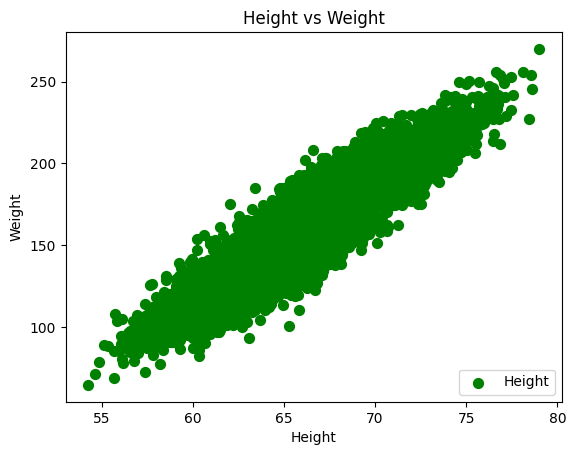

In [9]:
# plot Height vs weight
x2=data.iloc[:,1].values
y2=data.iloc[:,2].values
plt.scatter(x2,y2,label='Height',color='green',s=50)
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc='lower right')
plt.show()

- From the above plot can have idea that weight and height are highly dependent on each other.In other words,we can say that as height increases ,weight also increases.

In [10]:
data.Height.corr(data.Weight)

0.9247562987378065

#### 0.9247562987378065
so Height and weight are highly depanding on each other

# sparting the depanding and independing values


In [11]:
# Depanding variables oor values
X=data.iloc[:,1:2].values
print(X)

[[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [12]:
# indepanding variables or values
y=data.iloc[:,2].values
print(y)

[241.8935632 162.3104725 212.7408556 ... 128.4753188 163.8524613
 113.6491027]


# Step 2-Splitting the dataset into training and testing set

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Step 3-Build a linear model

In [14]:
# creating a linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Training the model

In [15]:
regressor.fit(X_train, y_train)

LinearRegression()

# Prediction on Training Data : Training Accuracy

In [16]:
y_train_pred=regressor.predict(X_train)

In [17]:
pd.DataFrame({'Orginal Weight':y_train,'Predicated Weight':y_train_pred})

,Orginal Weight,Predicated Weight
0,120.681906,123.062013
1,209.373126,225.547245
2,200.877279,177.872085
3,134.342745,156.996858
4,160.201031,167.504872
...,...,...
7995,139.223151,138.145545
7996,90.728561,103.575341
7997,156.800504,145.658394
7998,179.386817,182.236738


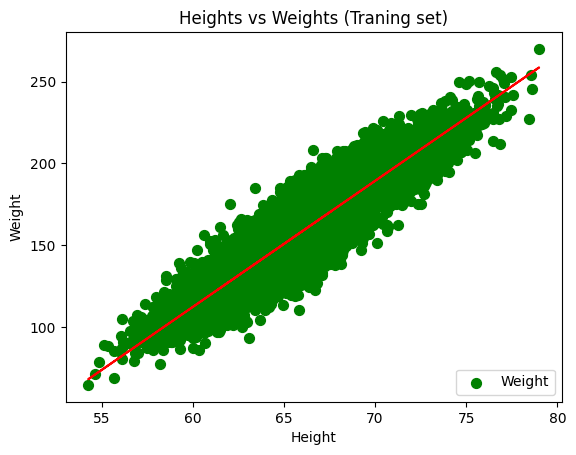

In [18]:
# visualize the traning set results
plt.scatter(X_train,y_train,label='Weight',color='green',s=50)
plt.plot(X_train,y_train_pred,color='red')
plt.title("Heights vs Weights (Traning set)")
plt.xlabel("Height")
plt.ylabel('Weight')
plt.legend(loc='lower right')
plt.show()

In [19]:
print("Cofficents",regressor.coef_) 
print("Intercept",regressor.intercept_)

Cofficents [7.70218561]
Intercept -349.7878205825624


### y=wx+b
- Cofficents [7.70218561] is w slope values which is used in equction to find the best line 
- Intercept -349.7878205825624  is b y intersept which is help to find  used in equction to find the best line 

In [20]:
print('Variance score:%.2f'%regressor.score(X_train,y_train)) # Variance score:0.85 it show that our predication is 85 correct 

Variance score:0.85


# Prediction on Testing Data : Testing Accuracy

In [21]:
y_test_pred=regressor.predict(X_test)

In [22]:
pd.DataFrame({'Orginal Weight':y_test,'Predicated Weight':y_test_pred})

,Orginal Weight,Predicated Weight
0,173.115813,179.253990
1,195.162042,180.348483
2,170.217451,161.622888
3,215.049660,204.225307
4,182.721452,166.589062
...,...,...
1995,142.067438,156.620109
1996,119.967881,117.980213
1997,125.179380,129.202882
1998,187.573494,166.784705


In [23]:
# the means squre error
print("mean squre error: %.2f " %np.mean((regressor.predict(X_test)-(y_test)**2)))
print('variance score:%.2f' % regressor.score(X_test,y_test))

mean squre error: -27095.62 
variance score:0.86


In [29]:
def predicatedHeight(Hight):
    return regressor.predict([[Height]])

In [30]:
height = float(input("if you wana guess youe wait please provide me your height in feet"))*12
print(f"Our model says your weight is about {(predicatedHeight(height)*0.453592)} Kgs")

if you wana guess youe wait please provide me your height in feet3.4


NameError: name 'Height' is not defined